<a href="https://colab.research.google.com/github/Javeria-Arif/ClassificationAlgorithms/blob/main/Classification_Algorithms_CEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Naiive Bayes**

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt


df = pd.read_csv('titanic_data.csv')

df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

inputs = df.drop('Survived',axis='columns') #dependanr variables stored
target = df.Survived  #to be predicted

dummies = pd.get_dummies(inputs.Sex)    #converting male female into 0 n 1s

inputs = pd.concat([inputs,dummies],axis='columns')



inputs.drop(['Sex','male'],axis='columns',inplace=True)

inputs.columns[inputs.isna().any()]

inputs.Age = inputs.Age.fillna(inputs.Age.mean())

Separately done the same code as above for understanding

In [ ]:
dummies = pd.get_dummies(inputs.Sex)    #converting male female into 0 n 1s
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [ ]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [ ]:

inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1


In [ ]:
inputs.columns[inputs.isna().any()]

inputs.Age[:20]                 #checking age has nan values

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
Name: Age, dtype: float64

In [ ]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


Continued now..

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
model.score(X_test,y_test),model.score(X_train,y_train)

(0.7686567164179104, 0.7800963081861958)

In [ ]:
y_predicted = model.predict(X_test)

#classification techniques with respect to confusion matrix,
#accuracy, recall, precision, FPR, and ROC metrics
print(classification_report(y_test,y_predicted))
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted,pos_label=2)
#metrics.plot_roc_curve(model, X_test, y_test)
#plt.show()

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       161
           1       0.71      0.70      0.71       107

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.776     , 0.768     , 0.792     , 0.71774194, 0.80645161])

In [ ]:
print("Test set R^2: {:.2f}".format(model.score(X_test, y_test)))

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("MAE : {:2F}".format(mean_absolute_error(y_test,y_predicted)))
print("MSE : {:2F}".format(mean_squared_error(y_test,y_predicted)))

Test set R^2: 0.77
MAE : 0.231343
MSE : 0.231343


# **LOGISTIC REGRESSION**

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
df = pd.read_csv('titanic_data.csv')
df.head(3)
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

inputs = df.drop('Survived',axis='columns') #dependanr variables stored
target = df.Survived  #to be predicted

dummies = pd.get_dummies(inputs.Sex)    #converting male female into 0 n 1s

inputs = pd.concat([inputs,dummies],axis='columns')



inputs.drop(['Sex','male'],axis='columns',inplace=True)

inputs.columns[inputs.isna().any()]

inputs.Age = inputs.Age.fillna(inputs.Age.mean())

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(inputs,target,test_size=0.20,random_state=0)

model = LogisticRegression()

# Fit the data(train the model)
model.fit(X_train, Y_train)
# Predict
y_pred = model.predict(X_test)


              precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


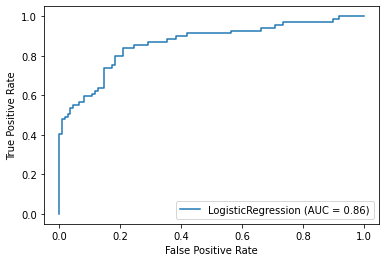

In [ ]:
#classification techniques with respect to confusion matrix, accuracy, recall, precision, FPR, and ROC metrics
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(Y_test,y_pred))
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred,pos_label=2)
metrics.plot_roc_curve(model, X_test, Y_test)
plt.show()

In [ ]:
model.score(X_train,Y_train),model.score(X_test,Y_test)        #Generalizaton

(0.7949438202247191, 0.8100558659217877)

In [ ]:
print("Test set R^2: {:.2f}".format(model.score(X_test, Y_test)))

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("MAE : {:2F}".format(mean_absolute_error(Y_test,y_pred)))
print("MSE : {:2F}".format(mean_squared_error(Y_test,y_pred)))

Test set R^2: 0.81
MAE : 0.189944
MSE : 0.189944


## **KNN**

The accuracy is70.39106145251397%
[[95 15]
 [38 31]]
              precision    recall  f1-score   support

     class 0       0.71      0.86      0.78       110
     class 1       0.67      0.45      0.54        69

    accuracy                           0.70       179
   macro avg       0.69      0.66      0.66       179
weighted avg       0.70      0.70      0.69       179



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


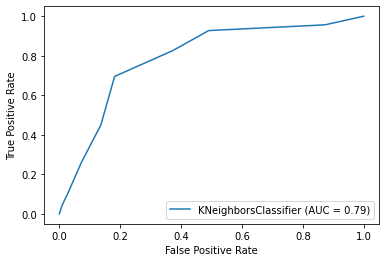

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
df = pd.read_csv('titanic_data.csv')
df.head(3)
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

inputs = df.drop('Survived',axis='columns') #dependanr variables stored
target = df.Survived  #to be predicted

dummies = pd.get_dummies(inputs.Sex)    #converting male female into 0 n 1s

inputs = pd.concat([inputs,dummies],axis='columns')



inputs.drop(['Sex','male'],axis='columns',inplace=True)

inputs.columns[inputs.isna().any()]

inputs.Age = inputs.Age.fillna(inputs.Age.mean())

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(inputs,target,test_size=0.20,random_state=0)


# Load libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# Train a KNN classifier with 5 neighborss
knn = KNeighborsClassifier(n_neighbors=8, n_jobs=-1).fit(X_train,Y_train);
Y_pred=knn.predict(X_test)
print("The accuracy is"+str(metrics.accuracy_score(Y_test,Y_pred)*100)+"%")
print(confusion_matrix(Y_test, Y_pred))
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, Y_pred,target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred,pos_label=2)
metrics.plot_roc_curve(knn, X_test, Y_test)
plt.show()


In [ ]:
knn.score(X_train,Y_train),knn.score(X_test,Y_test)        

(0.7542134831460674, 0.7039106145251397)

In [ ]:
print("Test set R^2: {:.2f}".format(knn.score(X_test, Y_test)))

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("MAE : {:2F}".format(mean_absolute_error(Y_test,Y_pred)))
print("MSE : {:2F}".format(mean_squared_error(Y_test,Y_pred)))

Test set R^2: 0.70
MAE : 0.296089
MSE : 0.296089


# **Leave one out**

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from numpy import mean

cv =LeaveOneOut()
score=cross_val_score(knn, X_train,Y_train,cv=cv)

print(mean(score))


0.7050561797752809
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0